<a href="https://colab.research.google.com/github/Esmreety/Image-Classification/blob/master/Cat_vs_Dog_Classifier_without_Augmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import backend as k
import numpy as np
from keras.preprocessing import image
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [ ]:
img_width, img_height = 150, 150
train_data_dir = '/content/cats_and_dogs_filtered/train'
validation_data_dir = '/content/cats_and_dogs_filtered/validation'
batch_size = 20

if k.image_data_format() == 'channels_first':
  input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
train_datagen = ImageDataGenerator(
                     rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
                              train_data_dir,
                              target_size = (img_width, img_height),
                              batch_size = batch_size,
                                class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                                validation_data_dir,
                                target_size = (img_width, img_height),
                                batch_size = batch_size,
                                class_mode = 'binary')
                                                              


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer = RMSprop(lr=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
 history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100, # 2000 images = batch_size * steps
    epochs = 100,
    validation_data = validation_generator,
    verbose = 2,
    validation_steps = 50) #1000 images = batch_size*steps
model.save_weights('classifier.h5')

Epoch 1/100
 - 14s - loss: 0.6898 - accuracy: 0.5410 - val_loss: 0.6622 - val_accuracy: 0.6210
Epoch 2/100
 - 8s - loss: 0.6583 - accuracy: 0.6000 - val_loss: 0.6976 - val_accuracy: 0.6340
Epoch 3/100
 - 8s - loss: 0.6046 - accuracy: 0.6720 - val_loss: 0.6357 - val_accuracy: 0.6920
Epoch 4/100
 - 8s - loss: 0.5680 - accuracy: 0.6990 - val_loss: 0.7886 - val_accuracy: 0.6930
Epoch 5/100
 - 8s - loss: 0.5416 - accuracy: 0.7270 - val_loss: 0.6533 - val_accuracy: 0.6840
Epoch 6/100
 - 8s - loss: 0.5116 - accuracy: 0.7425 - val_loss: 0.5448 - val_accuracy: 0.7120
Epoch 7/100
 - 8s - loss: 0.4905 - accuracy: 0.7675 - val_loss: 0.6735 - val_accuracy: 0.7210
Epoch 8/100
 - 8s - loss: 0.4574 - accuracy: 0.7860 - val_loss: 0.4846 - val_accuracy: 0.7180
Epoch 9/100
 - 8s - loss: 0.4284 - accuracy: 0.7985 - val_loss: 0.4507 - val_accuracy: 0.7270
Epoch 10/100
 - 8s - loss: 0.3999 - accuracy: 0.8170 - val_loss: 0.6807 - val_accuracy: 0.7340
Epoch 11/100
 - 8s - loss: 0.3873 - accuracy: 0.8275 - val

In [ ]:

from google.colab import files
uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
if classes[0]>0:
    print(fn + " is a dog")
else:
    print(fn + " is a cat")

 

Saving 51.jpg to 51.jpg
[1.]
51.jpg is a dog


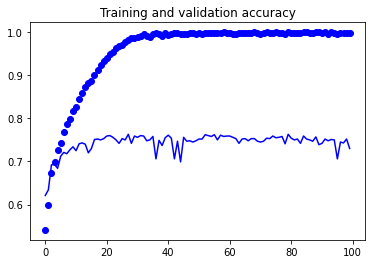

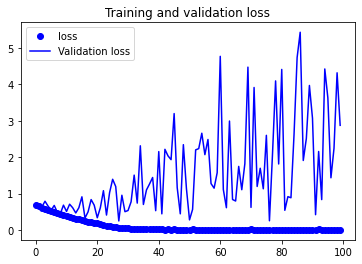

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()